In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [205]:
df = pd.read_csv("startup data.csv")
print(df.head())

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  ...  \
0      San Diego                     NaN        Bandsintown       1  ...   
1      Los Gatos                     NaN          TriCipher       1  ...   
2      San Diego      San Diego CA 92121              Plixi       1  ...   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1  ...   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0  ...   

  object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
0    c:6669      0         1          0          

**1. DATA CLEANING**

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [207]:
df.shape

(923, 49)

In [208]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [209]:
df=df.drop(columns =['Unnamed: 0','state_code','latitude','longitude','zip_code','id','city','Unnamed: 6','name','labels','first_funding_at','last_funding_at','state_code.1','category_code','object_id','has_roundA','has_roundB','has_roundC','has_roundD'])

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   founded_at                923 non-null    object 
 1   closed_at                 335 non-null    object 
 2   age_first_funding_year    923 non-null    float64
 3   age_last_funding_year     923 non-null    float64
 4   age_first_milestone_year  771 non-null    float64
 5   age_last_milestone_year   771 non-null    float64
 6   relationships             923 non-null    int64  
 7   funding_rounds            923 non-null    int64  
 8   funding_total_usd         923 non-null    int64  
 9   milestones                923 non-null    int64  
 10  is_CA                     923 non-null    int64  
 11  is_NY                     923 non-null    int64  
 12  is_MA                     923 non-null    int64  
 13  is_TX                     923 non-null    int64  
 14  is_otherst

In [211]:
df.isnull().sum()



,0
founded_at,0
closed_at,588
age_first_funding_year,0
age_last_funding_year,0
age_first_milestone_year,152
age_last_milestone_year,152
relationships,0
funding_rounds,0
funding_total_usd,0
milestones,0


In [212]:
df['closed_at'] = df['closed_at'].fillna('Active')
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].median(), inplace=True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].median(), inplace=True)

/tmp/ipython-input-1807095401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].median(), inplace=True)
/tmp/ipython-input-1807095401.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   founded_at                923 non-null    object 
 1   closed_at                 923 non-null    object 
 2   age_first_funding_year    923 non-null    float64
 3   age_last_funding_year     923 non-null    float64
 4   age_first_milestone_year  923 non-null    float64
 5   age_last_milestone_year   923 non-null    float64
 6   relationships             923 non-null    int64  
 7   funding_rounds            923 non-null    int64  
 8   funding_total_usd         923 non-null    int64  
 9   milestones                923 non-null    int64  
 10  is_CA                     923 non-null    int64  
 11  is_NY                     923 non-null    int64  
 12  is_MA                     923 non-null    int64  
 13  is_TX                     923 non-null    int64  
 14  is_otherst

In [214]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [215]:
df.shape

(922, 30)

In [216]:
#Encode the target variable

df['status'] = df['status'].map({
    'acquired': 1,
    'operating': 1,
    'closed': 0
})

**2. EDA**

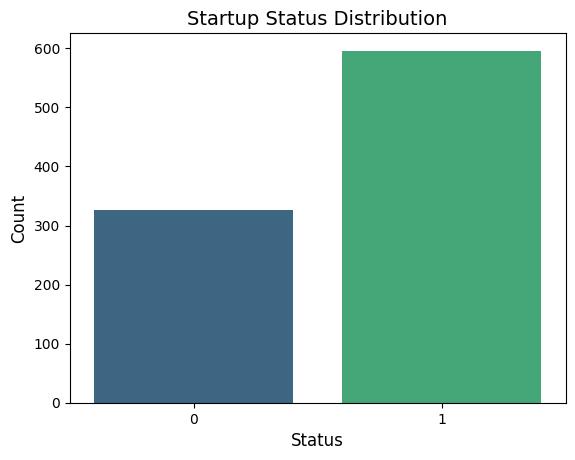

In [217]:
sns.countplot(
    x='status',
    hue='status',
    data=df,
    palette='viridis',   # other cool options: 'cool', 'viridis', 'Blues'
    legend=False
)
plt.title("Startup Status Distribution", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


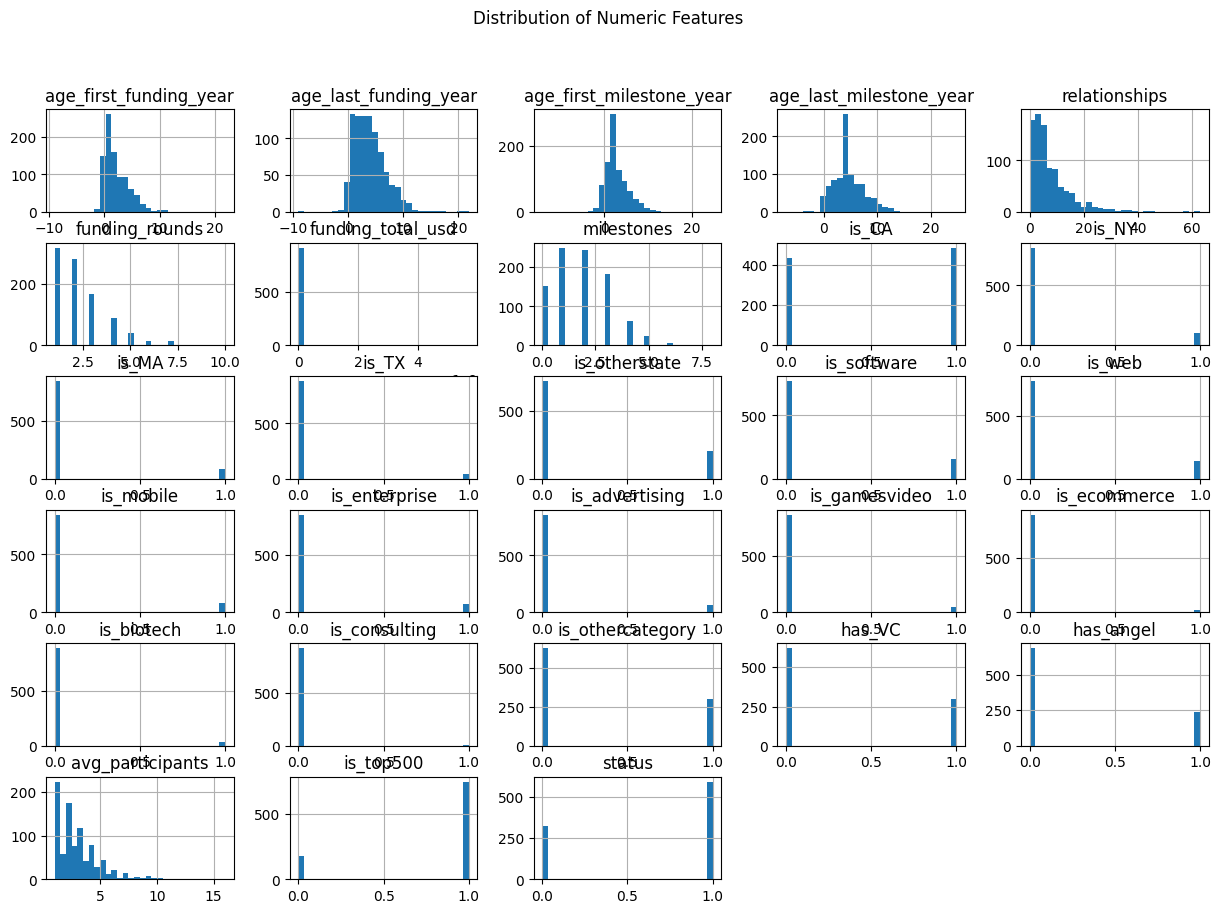

In [218]:
#Univariate Analysis (One Feature at a Time)
#for neumerical feature
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numeric Features")
plt.show()


founded_at
1/1/2003    55
1/1/2005    54
1/1/2002    54
1/1/2006    54
1/1/2000    53
Name: count, dtype: int64


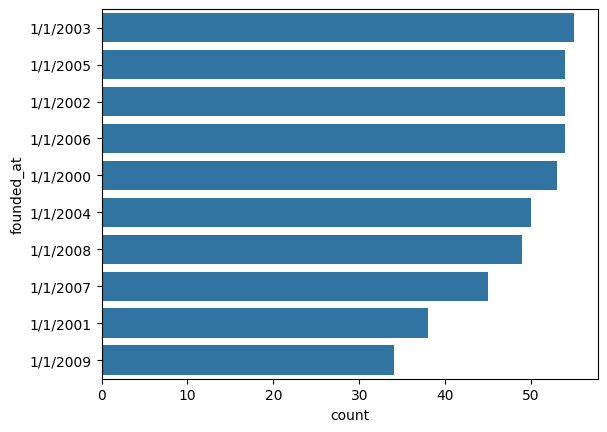

closed_at
Active      587
6/1/2013     25
1/1/2012     24
7/1/2013     15
5/1/2013     12
Name: count, dtype: int64


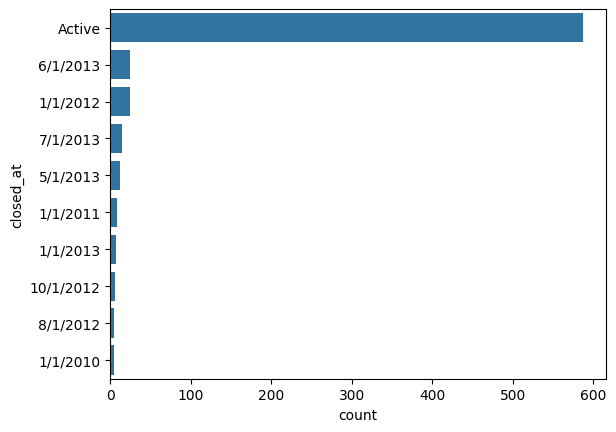

In [219]:
#Univariate Analysis (One Feature at a Time)
#for categorical feature
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(df[col].value_counts()[:5])
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    plt.show()


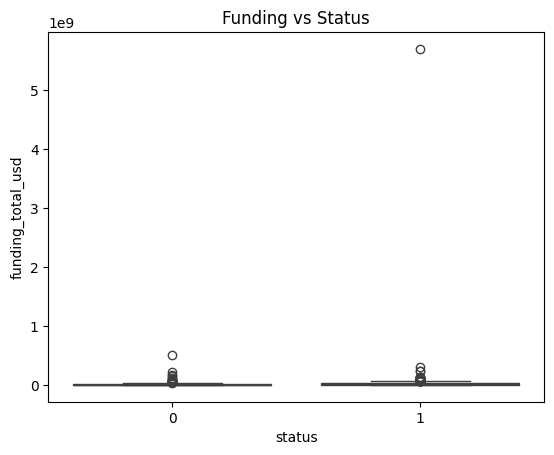

In [220]:
#Bivariate Analysis (Feature vs Target)
#Numeric vs Target:
sns.boxplot(x='status', y='funding_total_usd', data=df)
plt.title("Funding vs Status")
plt.show()


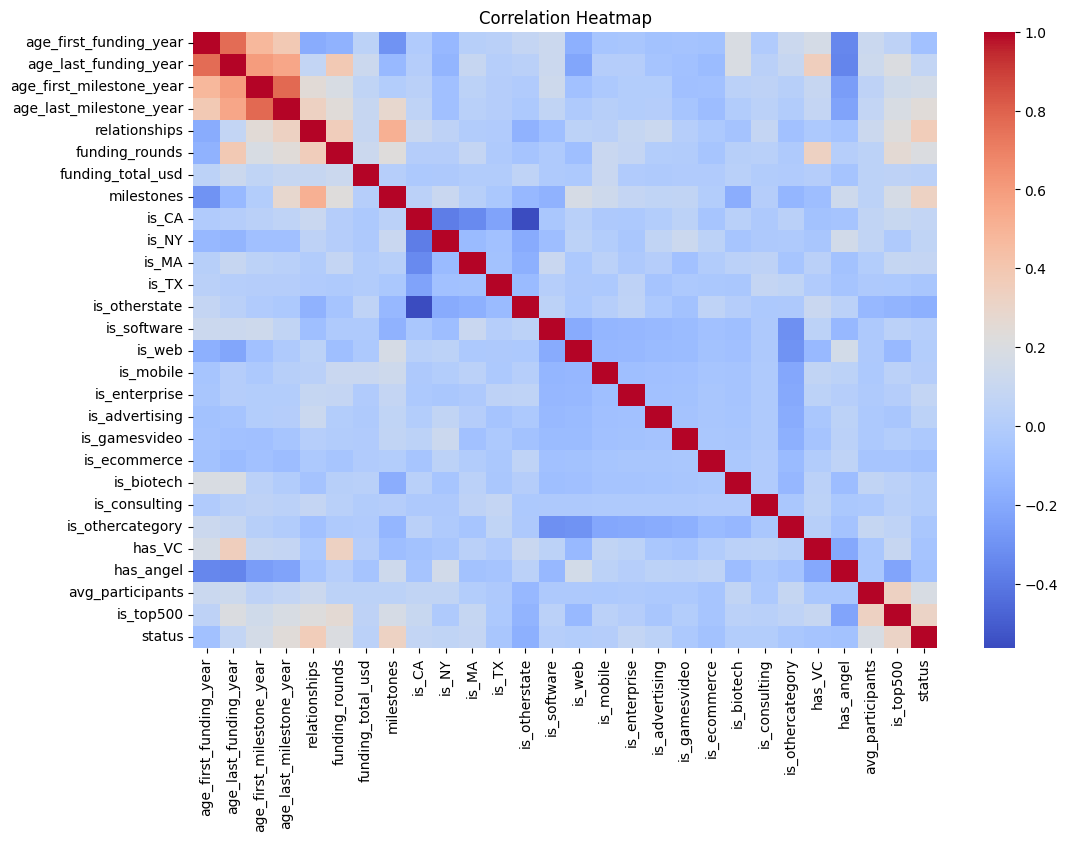

In [221]:
#Correlation Analysis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


**3. Feature Selection**

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 0 to 922
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   founded_at                922 non-null    object 
 1   closed_at                 922 non-null    object 
 2   age_first_funding_year    922 non-null    float64
 3   age_last_funding_year     922 non-null    float64
 4   age_first_milestone_year  922 non-null    float64
 5   age_last_milestone_year   922 non-null    float64
 6   relationships             922 non-null    int64  
 7   funding_rounds            922 non-null    int64  
 8   funding_total_usd         922 non-null    int64  
 9   milestones                922 non-null    int64  
 10  is_CA                     922 non-null    int64  
 11  is_NY                     922 non-null    int64  
 12  is_MA                     922 non-null    int64  
 13  is_TX                     922 non-null    int64  
 14  is_otherstate  

In [223]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

# Example: extract founding year, closing year
df['founded_year'] = df['founded_at'].dt.year
df['closed_year'] = df['closed_at'].dt.year



/tmp/ipython-input-1572095312.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')


In [224]:
df.shape

(922, 32)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 0 to 922
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   founded_at                922 non-null    datetime64[ns]
 1   closed_at                 335 non-null    datetime64[ns]
 2   age_first_funding_year    922 non-null    float64       
 3   age_last_funding_year     922 non-null    float64       
 4   age_first_milestone_year  922 non-null    float64       
 5   age_last_milestone_year   922 non-null    float64       
 6   relationships             922 non-null    int64         
 7   funding_rounds            922 non-null    int64         
 8   funding_total_usd         922 non-null    int64         
 9   milestones                922 non-null    int64         
 10  is_CA                     922 non-null    int64         
 11  is_NY                     922 non-null    int64         
 12  is_MA                     9

In [226]:
df['closed_year'].fillna(0, inplace=True)

/tmp/ipython-input-3852136100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['closed_year'].fillna(0, inplace=True)


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 0 to 922
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   founded_at                922 non-null    datetime64[ns]
 1   closed_at                 335 non-null    datetime64[ns]
 2   age_first_funding_year    922 non-null    float64       
 3   age_last_funding_year     922 non-null    float64       
 4   age_first_milestone_year  922 non-null    float64       
 5   age_last_milestone_year   922 non-null    float64       
 6   relationships             922 non-null    int64         
 7   funding_rounds            922 non-null    int64         
 8   funding_total_usd         922 non-null    int64         
 9   milestones                922 non-null    int64         
 10  is_CA                     922 non-null    int64         
 11  is_NY                     922 non-null    int64         
 12  is_MA                     9

In [228]:
df= df.drop(['founded_at', 'closed_at','closed_year'], axis=1)
X = df.drop('status',axis=1)
y = df['status']

In [229]:
X.dtypes

,0
age_first_funding_year,float64
age_last_funding_year,float64
age_first_milestone_year,float64
age_last_milestone_year,float64
relationships,int64
funding_rounds,int64
funding_total_usd,int64
milestones,int64
is_CA,int64
is_NY,int64


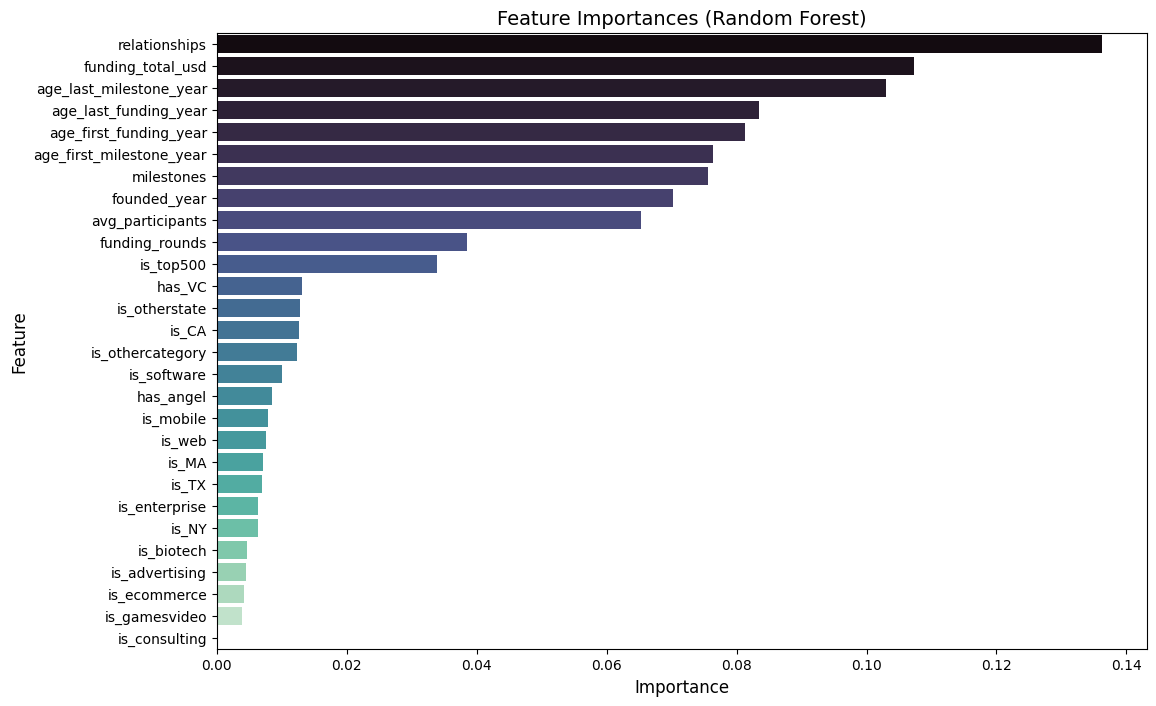

relationships               0.136320
funding_total_usd           0.107296
age_last_milestone_year     0.102925
age_last_funding_year       0.083466
age_first_funding_year      0.081296
age_first_milestone_year    0.076366
milestones                  0.075550
founded_year                0.070156
avg_participants            0.065360
funding_rounds              0.038582
is_top500                   0.033890
has_VC                      0.013122
is_otherstate               0.012813
is_CA                       0.012656
is_othercategory            0.012337
is_software                 0.010094
has_angel                   0.008423
is_mobile                   0.007940
is_web                      0.007546
is_MA                       0.007152
is_TX                       0.006931
is_enterprise               0.006311
is_NY                       0.006301
is_biotech                  0.004585
is_advertising              0.004478
is_ecommerce                0.004191
is_gamesvideo               0.003852
i

In [230]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get all feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort all features
importances = importances.sort_values(ascending=False)

# Plot all — fixed version for Seaborn 0.14+
plt.figure(figsize=(12, 8))
sns.barplot(
    x=importances.values,
    y=importances.index,
    hue=importances.index,       # add hue = y variable
    dodge=False,
    palette="mako",              # choose your palette
    legend=False                 # hide the redundant legend
)
plt.title("Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# Print all
print(importances)


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 0 to 922
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    922 non-null    float64
 1   age_last_funding_year     922 non-null    float64
 2   age_first_milestone_year  922 non-null    float64
 3   age_last_milestone_year   922 non-null    float64
 4   relationships             922 non-null    int64  
 5   funding_rounds            922 non-null    int64  
 6   funding_total_usd         922 non-null    int64  
 7   milestones                922 non-null    int64  
 8   is_CA                     922 non-null    int64  
 9   is_NY                     922 non-null    int64  
 10  is_MA                     922 non-null    int64  
 11  is_TX                     922 non-null    int64  
 12  is_otherstate             922 non-null    int64  
 13  is_software               922 non-null    int64  
 14  is_web         

**4. MODEL TRAINING AND EVALUATION**



In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 0 to 922
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    922 non-null    float64
 1   age_last_funding_year     922 non-null    float64
 2   age_first_milestone_year  922 non-null    float64
 3   age_last_milestone_year   922 non-null    float64
 4   relationships             922 non-null    int64  
 5   funding_rounds            922 non-null    int64  
 6   funding_total_usd         922 non-null    int64  
 7   milestones                922 non-null    int64  
 8   is_CA                     922 non-null    int64  
 9   is_NY                     922 non-null    int64  
 10  is_MA                     922 non-null    int64  
 11  is_TX                     922 non-null    int64  
 12  is_otherstate             922 non-null    int64  
 13  is_software               922 non-null    int64  
 14  is_web         

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [234]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

F1 scores for each fold: [0.7711812  0.77346939 0.72777778 0.69383619 0.8       ]
Mean Cross-Validation F1 Score: 0.753252912010099
Test set performance:
 Precision: 0.788
 Recall: 0.743
 F1 Score: 0.759
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        56
           1       0.83      0.91      0.87       129

    accuracy                           0.81       185
   macro avg       0.79      0.74      0.76       185
weighted avg       0.80      0.81      0.80       185



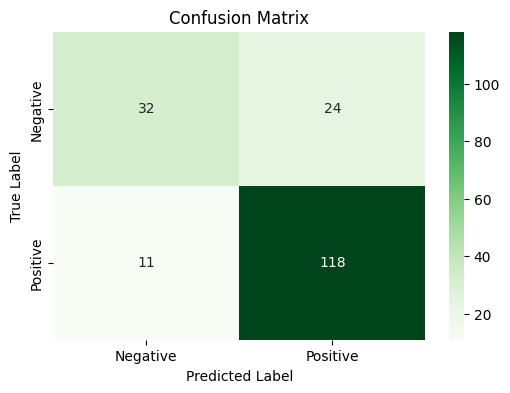

In [235]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

model = RandomForestClassifier(random_state=42)


scores = cross_val_score(model, X_train, y_train,cv = skf, scoring='f1_macro')



print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test set performance:")
print(" Precision:", round(precision_score(y_test, y_pred,average='macro'), 3))
print(" Recall:", round(recall_score(y_test, y_pred,average='macro'), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred,average='macro'), 3))
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


0:	learn: 0.7538200	total: 2.31ms	remaining: 1.15s
100:	learn: 0.9066214	total: 198ms	remaining: 783ms
200:	learn: 0.9813243	total: 394ms	remaining: 586ms
300:	learn: 1.0000000	total: 591ms	remaining: 390ms
400:	learn: 1.0000000	total: 783ms	remaining: 193ms
499:	learn: 1.0000000	total: 1s	remaining: 0us
0:	learn: 0.7775891	total: 3.49ms	remaining: 1.74s
100:	learn: 0.9066214	total: 198ms	remaining: 782ms
200:	learn: 0.9796265	total: 388ms	remaining: 578ms
300:	learn: 0.9983022	total: 588ms	remaining: 388ms
400:	learn: 1.0000000	total: 798ms	remaining: 197ms
499:	learn: 1.0000000	total: 1s	remaining: 0us
0:	learn: 0.7491525	total: 2.23ms	remaining: 1.11s
100:	learn: 0.9152542	total: 194ms	remaining: 767ms
200:	learn: 0.9762712	total: 386ms	remaining: 575ms
300:	learn: 1.0000000	total: 577ms	remaining: 381ms
400:	learn: 1.0000000	total: 800ms	remaining: 197ms
499:	learn: 1.0000000	total: 1s	remaining: 0us
0:	learn: 0.7694915	total: 2.17ms	remaining: 1.08s
100:	learn: 0.9169492	total: 19

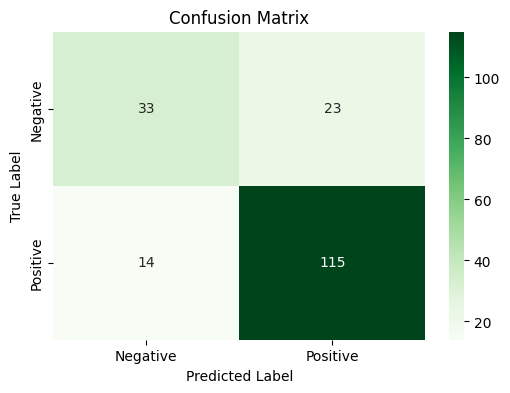

In [236]:
#catboost Classifier
!pip install catboost

from catboost import CatBoostClassifier, Pool

# Identify categorical columns automatically
# cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
# print("Categorical features:", cat_features)

# Define and train CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)


scores = cross_val_score(catboost_model, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))

# CatBoost can handle categorical and missing data directly
catboost_model .fit(X_train,y_train)
# Predict and evaluate
y_pred =catboost_model .predict(X_test)
print("Test set performance:")
print(" Precision:", round(precision_score(y_test, y_pred), 3))
print(" Recall:", round(recall_score(y_test, y_pred), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred), 3))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

F1 scores for each fold: [0.69467367 0.67711089 0.71969882 0.65779352 0.7120814 ]
Mean Cross-Validation F1 Score: 0.6922716618866509
Test set performance:
 Precision: 0.7
 Recall: 0.732
 F1 Score: 0.703

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.75      0.62        56
           1       0.87      0.71      0.78       129

    accuracy                           0.72       185
   macro avg       0.70      0.73      0.70       185
weighted avg       0.77      0.72      0.73       185



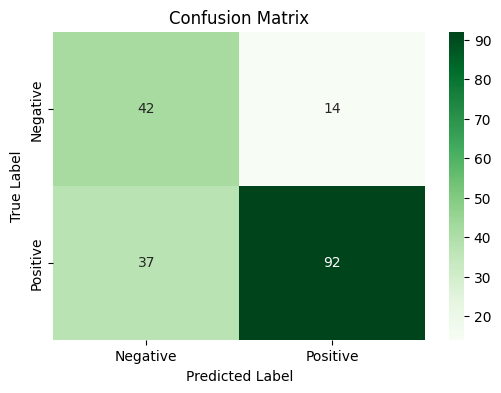

In [237]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs',class_weight='balanced', random_state=42)


scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=skf, scoring='f1_macro')

print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print("Test set performance:")
print(" Precision:", round(precision_score(y_test, y_pred, average='macro', zero_division=0), 3))
print(" Recall:", round(recall_score(y_test, y_pred, average='macro', zero_division=0), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred, average='macro', zero_division=0), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


F1 scores for each fold: [0.78643579 0.73074591 0.72159091 0.73411894 0.80317382]
Mean Cross-Validation F1 Score: 0.7552130709699201
Test set performance:
 Precision: 0.766
 Recall: 0.745
 F1 Score: 0.754
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        56
           1       0.84      0.88      0.86       129

    accuracy                           0.80       185
   macro avg       0.77      0.75      0.75       185
weighted avg       0.79      0.80      0.80       185



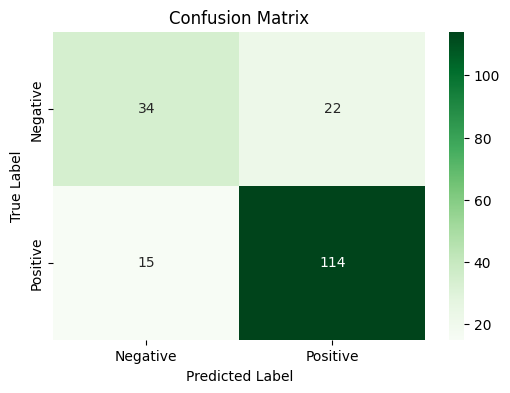

In [238]:
#xgboost Classifier
from xgboost import XGBClassifier


# Create the model
xgb_model = XGBClassifier(
    n_estimators=200,        # number of trees
    learning_rate=0.05,     # shrinkage rate
    max_depth=6,            # depth of tree
    subsample=0.8,          # % of data used per tree
    colsample_bytree=0.8,   # % of features per tree
    eval_metric='logloss'   # evaluation metric (important)
)

scores = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='f1_macro')

print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
# Evaluate
print("Test set performance:")
print(" Precision:", round(precision_score(y_test, y_pred, average='macro'), 3))
print(" Recall:", round(recall_score(y_test, y_pred, average='macro'), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 3))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

F1 scores for each fold: [0.69743206 0.68380573 0.63345231 0.64211344 0.71347893]
Mean Cross-Validation F1 Score: 0.674056493877657
Test set performance:
Model Evaluation Results:
 Precision: 0.652
 Recall: 0.668
 F1 Score: 0.656

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.61      0.54        56
           1       0.81      0.73      0.77       129

    accuracy                           0.69       185
   macro avg       0.65      0.67      0.66       185
weighted avg       0.71      0.69      0.70       185



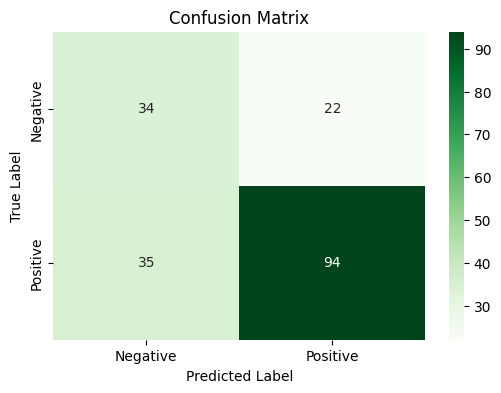

In [239]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # or 'gini'
    max_depth=None,       # you can tune this
    random_state=42
)
scores = cross_val_score(dt_model, X_train, y_train, cv=skf, scoring='f1_macro')

print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))

dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

# # Evaluate Model
print("Test set performance:")
print("Model Evaluation Results:")
print(" Precision:", round(precision_score(y_test, y_pred,average='macro'), 3))
print(" Recall:", round(recall_score(y_test, y_pred, average='macro'), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

F1 scores for each fold: [0.65977011 0.66439909 0.61568627 0.62219626 0.64880801]
Mean Cross-Validation F1 Score: 0.6421719510169224
Test set performance:
 Precision: 0.642
 Recall: 0.614
 F1 Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        56
           1       0.76      0.85      0.80       129

    accuracy                           0.71       185
   macro avg       0.64      0.61      0.62       185
weighted avg       0.69      0.71      0.69       185



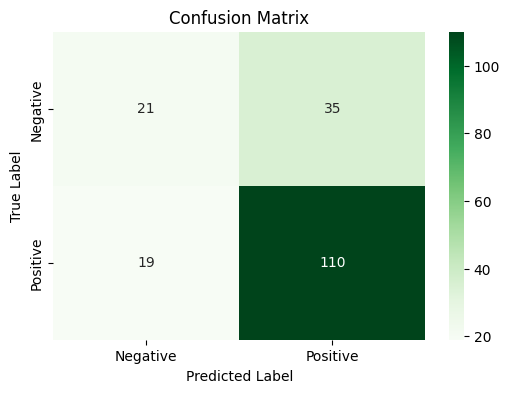

In [240]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=skf, scoring='f1_macro')

print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))

knn_model.fit(X_train_scaled, y_train)

# # Make predictions
y_pred = knn_model.predict(X_test_scaled)

# # Evaluate model
print("Test set performance:")
print(" Precision:", round(precision_score(y_test, y_pred, average='macro'), 3))
print(" Recall:", round(recall_score(y_test, y_pred, average='macro'), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

F1 scores for each fold: [0.61470655 0.62051282 0.68175828 0.37037037 0.6325    ]
Mean Cross-Validation F1 Score: 0.5839696056046971
Test set performance:
 Precision: 0.62
 Recall: 0.641
 F1 Score: 0.595

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.73      0.53        56
           1       0.83      0.55      0.66       129

    accuracy                           0.61       185
   macro avg       0.62      0.64      0.59       185
weighted avg       0.70      0.61      0.62       185



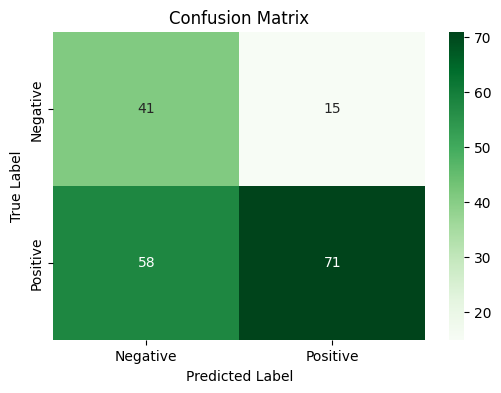

In [241]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Naive Bayes model
nb_model = GaussianNB()
scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=skf, scoring='f1_macro')

print("F1 scores for each fold:", scores)
print("Mean Cross-Validation F1 Score:", np.mean(scores))

nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_scaled)

# Evaluate model
print("Test set performance:")
print(" Precision:", round(precision_score(y_test, y_pred, average='macro'), 3))
print(" Recall:", round(recall_score(y_test, y_pred, average='macro'), 3))
print(" F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

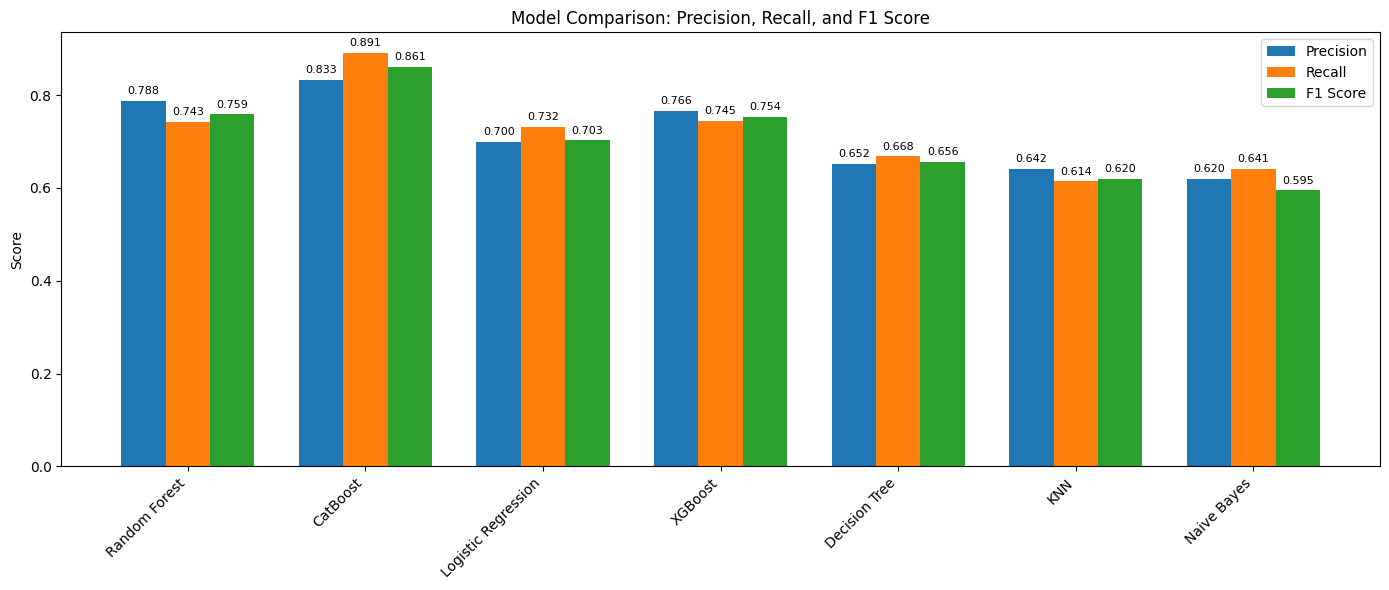

In [242]:
# Model names
models = [
    "Random Forest", "CatBoost", "Logistic Regression", "XGBoost",
     "Decision Tree", "KNN", "Naive Bayes"
]

# Precision, Recall, F1 scores
precision = [0.788, 0.833, 0.700, 0.766, 0.652, 0.642, 0.620]
recall    = [0.743, 0.891, 0.732, 0.745, 0.668, 0.614,  0.641]
f1_score  = [0.759, 0.861, 0.703, 0.754,  0.656, 0.620,  0.595]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(14,6))

bars1 = plt.bar(x - width, precision, width, label='Precision')
bars2 = plt.bar(x, recall, width, label='Recall')
bars3 = plt.bar(x + width, f1_score, width, label='F1 Score')

# Function to add labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}",
                 ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Model Comparison: Precision, Recall, and F1 Score")
plt.legend()
plt.tight_layout()
plt.show()
